<a href="https://www.kaggle.com/code/sumaya23abdul/cyclistic-bike-share-analyis-google-data-analyti?scriptVersionId=118600597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cyclistic Bike Share Analyis - Goolge Data analytics

# Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

### Characters and teams
* Cyclistic: A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself
apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with
disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about
8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to
commute to work each day.
* Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.
* Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program


### About the company
In 2016, Cyclistic launched a successful bike-share offering having a fleet of 5,824 bicycles that are tracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system at any time.

Riders who have an annual subscription are called members while riders who are single-ride or full-day pass users are considered casual riders.

The director of marketing is looking to maximize the number of annual memberships as they are more profitable than single-ride or full-day passes. This strategy is believed to be the key to future growth.

### 1. Ask

The questions that need to be answered are:

1)How do annual members and casual riders use Cyclistic bikes differently?
2)Why would casual riders buy Cyclistic annual memberships?
3)How can Cyclistic use digital media to influence casual riders to become members?

Prepare The dataset follows the ROCCC Analysis as described below:

Reliable - yes, not biased
Original - yes, can locate the original public data
Comprehensive - yes, not missing important information
Current - yes, updated monthly
Cited - yes

### 2. Prepare
You will use Cyclistic’s historical trip data to analyze and identify trends .
#### Download the previous 12 months of Cyclistic trip data
here [link](https://divvy-tripdata.s3.amazonaws.com/index.html) 


#### I have downloaded the data for Nov 2021-Oct 2022 

### Loading packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(geosphere)
library(readr)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Importing Dataset

In [2]:
Nov21 <- read_csv("/kaggle/input/cyclistic-bike-share-analysis/202111-divvy-tripdata.csv")
Dec21 <- read_csv("/kaggle/input/cyclistic-bike-share-analysis/202112-divvy-tripdata.csv")
Jan <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202201-divvy-tripdata.csv")
Feb <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202202-divvy-tripdata.csv")
Mar <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202203-divvy-tripdata.csv")
Apr <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202204-divvy-tripdata.csv")
May <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202205-divvy-tripdata.csv")
Jun <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202206-divvy-tripdata.csv")
Jul <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202207-divvy-tripdata.csv")
Aug <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202208-divvy-tripdata.csv")
Sep <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202209-divvy-tripdata.csv")
Oct <- read_csv ("/kaggle/input/cyclistic-bike-share-analysis/202210-divvy-tripdata.csv")

Rows: 359978 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 247540 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 103770 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

#### Merging data into a data frame

In [3]:
triprawdata <-rbind(Nov21,Dec21,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct)

## 3. Process
### Cleaning and Preparing Dataset

In [4]:
colnames(triprawdata)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [5]:
nrow(triprawdata) # no.of rows

[1] 5755694

In [6]:
ncol(triprawdata) # no.of columns

[1] 13

In [7]:
sum(is.na(triprawdata)) # sum of NA's in data

[1] 3648044

In [8]:
head(triprawdata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NA,NA,NA,NA,41.93000,-87.72000,41.96,-87.73,casual
90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NA,NA,NA,NA,41.96000,-87.70000,41.92,-87.70,casual
0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NA,NA,NA,NA,41.96000,-87.70000,41.96,-87.70,casual
2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NA,NA,NA,NA,41.94000,-87.79000,41.93,-87.79,casual
D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NA,NA,NA,NA,41.90000,-87.63000,41.88,-87.62,casual
02F85C2C3C5F7D46,electric_bike,2021-11-26 18:34:07,2021-11-26 18:52:49,Michigan Ave & Oak St,13042,NA,NA,41.90086,-87.62379,41.90,-87.63,casual


In [9]:
str(triprawdata)

spc_tbl_ [5,755,694 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5755694] "7C00A93E10556E47" "90854840DFD508BA" "0A7D10CDD144061C" "2F3BE33085BCFF02" ...
 $ rideable_type     : chr [1:5755694] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5755694], format: "2021-11-27 13:27:38" "2021-11-27 13:38:25" ...
 $ ended_at          : POSIXct[1:5755694], format: "2021-11-27 13:46:38" "2021-11-27 13:56:10" ...
 $ start_station_name: chr [1:5755694] NA NA NA NA ...
 $ start_station_id  : chr [1:5755694] NA NA NA NA ...
 $ end_station_name  : chr [1:5755694] NA NA NA NA ...
 $ end_station_id    : chr [1:5755694] NA NA NA NA ...
 $ start_lat         : num [1:5755694] 41.9 42 42 41.9 41.9 ...
 $ start_lng         : num [1:5755694] -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ end_lat           : num [1:5755694] 42 41.9 42 41.9 41.9 ...
 $ end_lng           : num [1:5755694] -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ member_casual

In [10]:
summary(triprawdata)

   ride_id          rideable_type        started_at                 
 Length:5755694     Length:5755694     Min.   :2021-11-01 00:00:14  
 Class :character   Class :character   1st Qu.:2022-04-27 16:40:09  
 Mode  :character   Mode  :character   Median :2022-06-30 18:31:03  
                                       Mean   :2022-06-13 23:04:32  
                                       3rd Qu.:2022-08-24 19:52:19  
                                       Max.   :2022-10-31 23:59:33  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-11-01 00:04:06   Length:5755694     Length:5755694    
 1st Qu.:2022-04-27 16:51:40   Class :character   Class :character  
 Median :2022-06-30 18:49:28   Mode  :character   Mode  :character  
 Mean   :2022-06-13 23:23:58                                        
 3rd Qu.:2022-08-24 20:10:05                                        
 Max.   :2022-11-07 04:53:58      

##### 5835 NA's each in end_lat and end_lng

##### Removing Rows with NA's

In [11]:
triprawdata<-na.omit(triprawdata)

##### adding new varibales and columns to the dataframe using mutate() function

In [12]:
moded_data <- triprawdata %>% 
  mutate(ride_duration=as.numeric(difftime(ended_at, started_at, units = "mins"))) %>% 
  mutate(ride_distance=distHaversine(cbind(start_lng,start_lat),cbind(end_lng,end_lat))) %>% 
  mutate(ride_year=year(started_at)) %>% 
  mutate(ride_month=month(started_at,label= TRUE)) %>% 
  mutate(day_of_week=weekdays(started_at)) %>% 
  mutate(hour_of_day=hour(started_at))

##### Filter the columns rides not starting from a station and rides not ending at a station
##### Filter rides with duration and distance of zero

In [13]:
clean_data <- moded_data %>%
filter(!is.na(start_station_name)) %>%
 filter(!is.na(end_station_name)) %>% 
filter(ride_duration>0) %>% 
 filter(ride_distance>0)



# 4. Analyze
### Key tasks
1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform Calculations
4. Identify trends and relationships


#### Compare members and Casual users

In [14]:
clean_data %>%
group_by(member_casual) %>% 
  summarise(n=n()) %>% 
  mutate(percent=n*100/sum(n))


member_casual,n,percent
<chr>,<int>,<dbl>
casual,1643167,39.05467
member,2564184,60.94533


# 5. Share
## Visualization

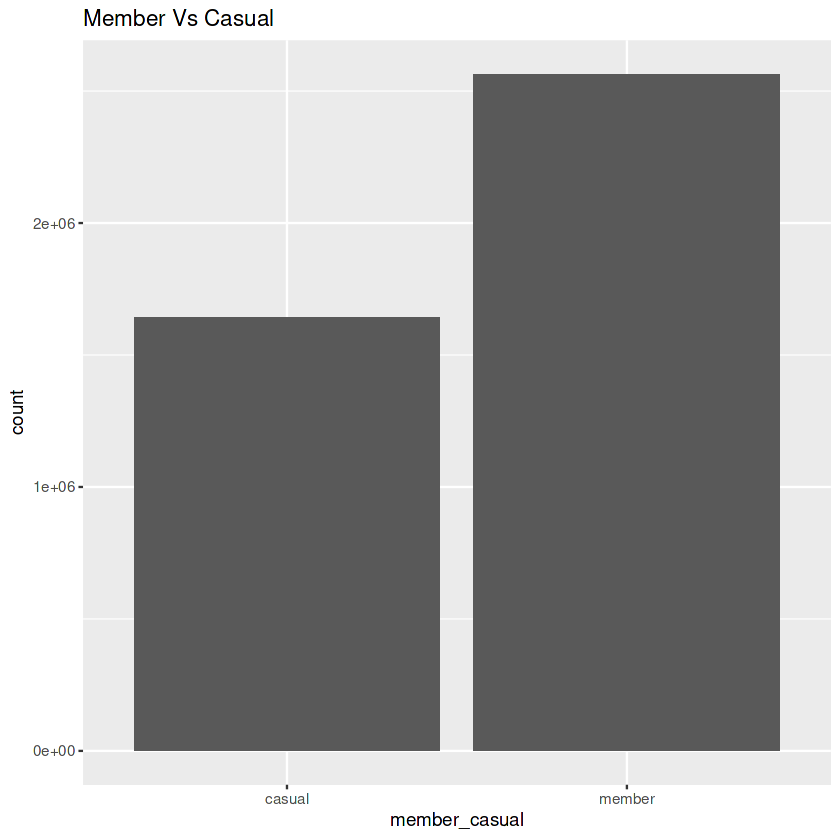

In [15]:
ggplot(data=clean_data, mapping = aes(x=member_casual)) + geom_bar() + labs(title = "Member Vs Casual")

#### Ride Analysis of Casual and Memeber users

In [16]:
bar <- clean_data %>% 
  group_by(member_casual) %>% 
summarise(avg_ride_length=mean(ride_duration))
  

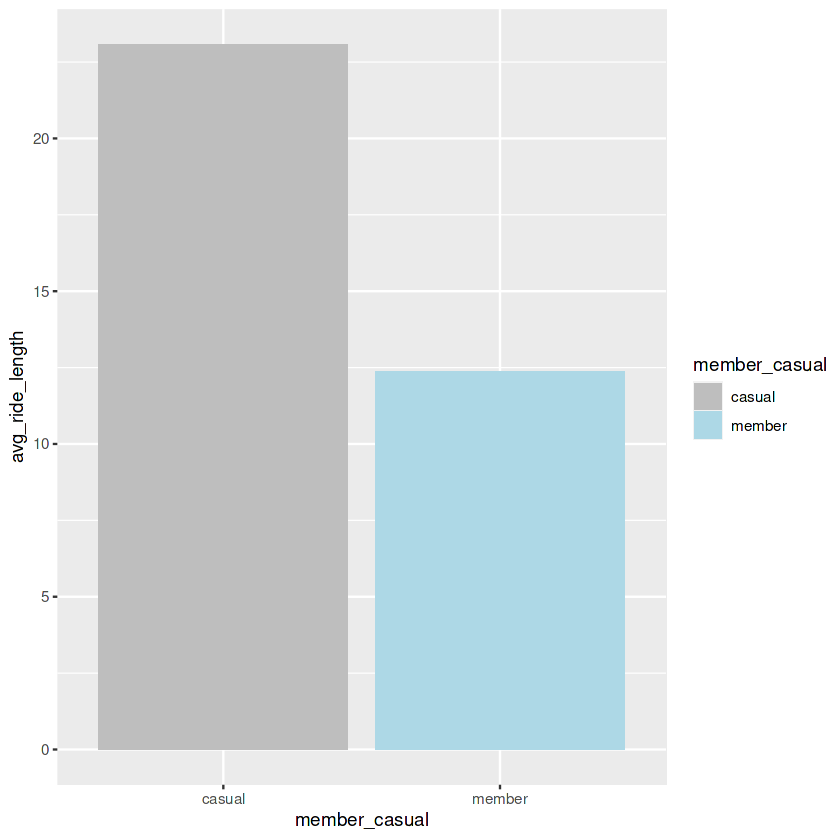

In [17]:
ggplot(bar,aes(x=member_casual, y=avg_ride_length, fill=member_casual))+
geom_col() + scale_fill_manual(values= c("Grey","lightBlue"))

#### Comparing Bikes


In [18]:
clean_data %>% 
  group_by(rideable_type) %>% 
  summarise(n=n()) %>% 
  mutate(percent=n*100/sum(n))

rideable_type,n,percent
<chr>,<int>,<dbl>
classic_bike,2473799,58.797067
docked_bike,147473,3.505127
electric_bike,1586079,37.697806


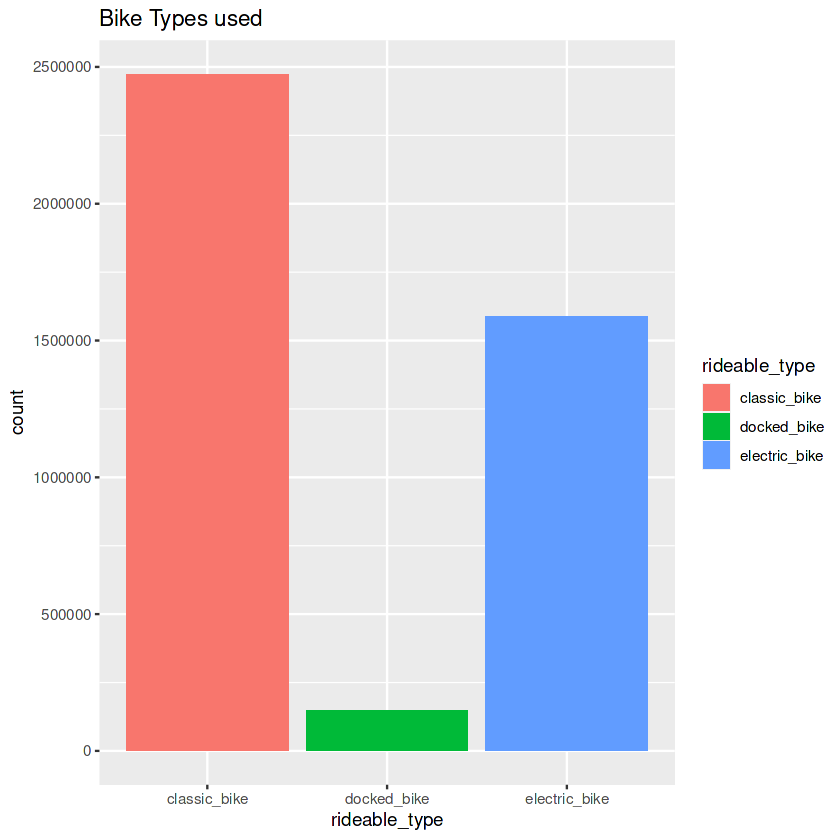

In [19]:
ggplot(data = clean_data,mapping= aes(x= rideable_type,fill=rideable_type)) +geom_bar() + labs(title="Bike Types used")

##### 1.Classic Bike is more preferred than elctric bike
#####  2.Docked Bike is the least preferred bike

#### Choice of Bikes By Riders

In [20]:
member_type<- clean_data %>%
group_by(member_casual, rideable_type)%>%
summarise(n=n()) %>%
mutate(percent=n*100/sum(n))


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


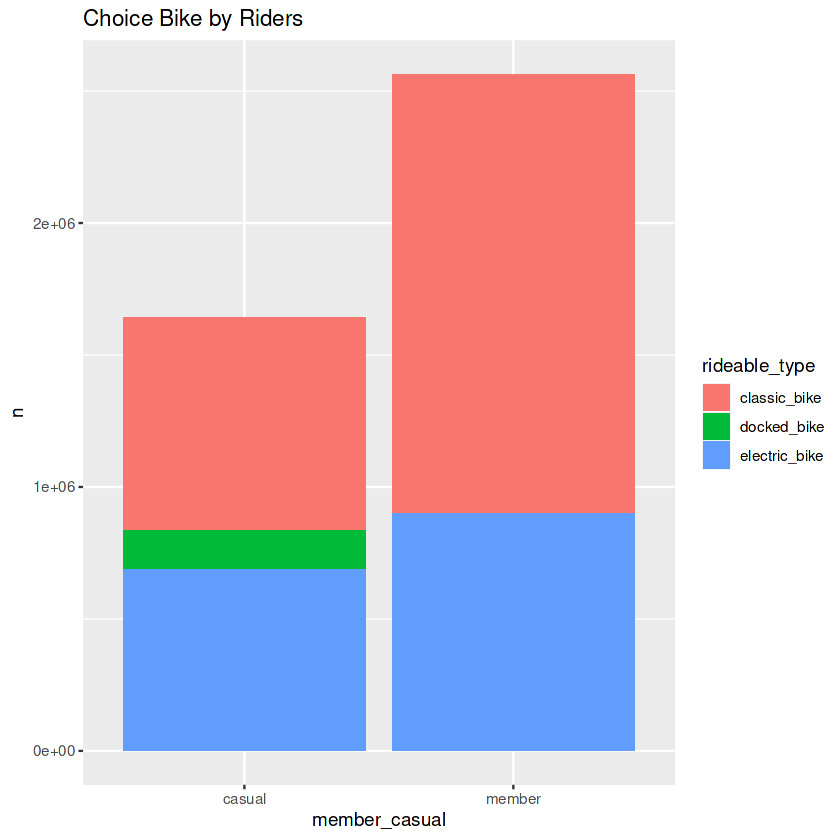

In [21]:
ggplot(data=as.data.frame(member_type),mapping=aes(x=member_casual, y=n, fill =rideable_type))+
geom_bar(stat="identity")+ labs(title="Choice Bike by Riders")

##### 1. Classic Bike is more preferred by memebers
##### 2. Electric Bike is preferred by both riders
##### 3. Docked Bike is preferred by Casual riders

#### Weekdays Rides

In [22]:
clean_data$day_of_week <- factor(clean_data$day_of_week,levels = c("Monday", "Tuesday","Wednesday","Thursday", "Friday", 
                                                                   "Saturday","Sunday"))

weektable<- clean_data %>% 
  group_by(day_of_week) %>% 
  summarise(n=n()) %>% 
  mutate(percent=n*100/sum(n))


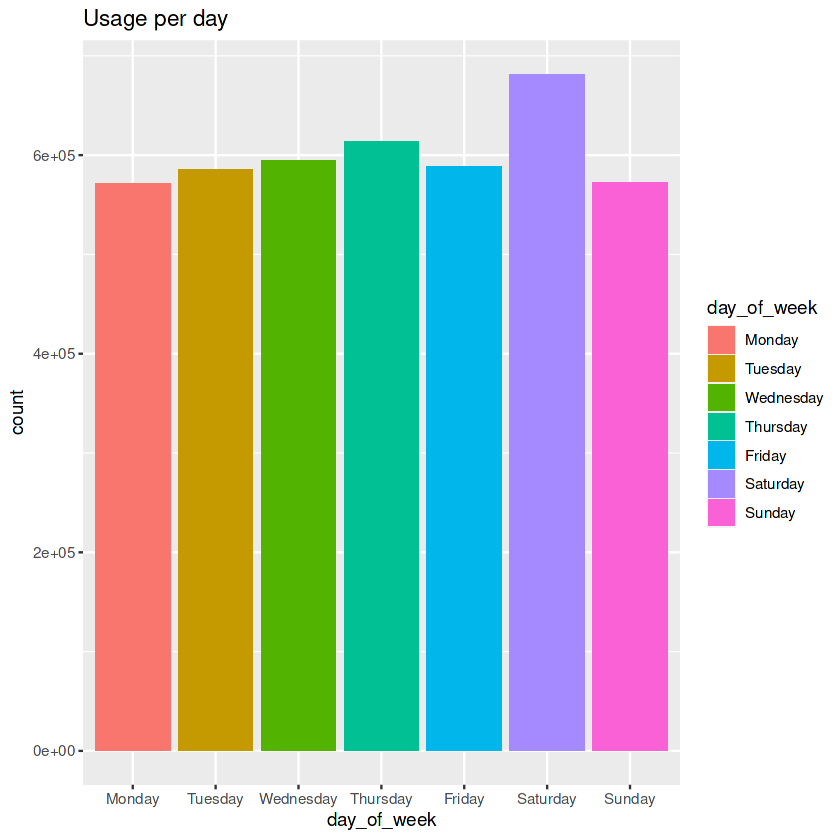

In [23]:
ggplot(data = clean_data,mapping= aes(x= day_of_week, fill=day_of_week)) +geom_bar() + labs(title="Usage per day")

#### Compare Daily Usage of Both Rides

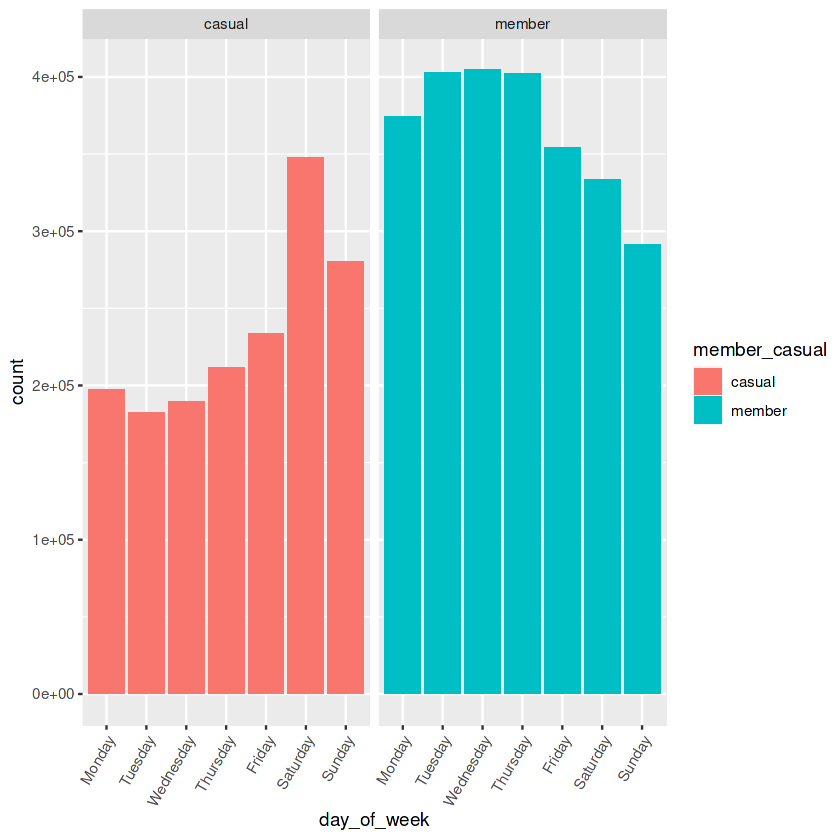

In [24]:
ggplot(data=clean_data, mapping=aes(x=day_of_week, fill=member_casual)) +
geom_bar() +facet_wrap(~member_casual) + theme(axis.text.x = element_text(angle=60, hjust=1))

##### 1. Memeber usuage is quite similar throughout the week except Sunday
##### 2. Casual Riders preferred to ride on weekends, Saturday

# Vizualization in Tableau

### Here i would like to share my Tableau Dashboards
### Click the Link here
### [Dashboard](https://public.tableau.com/views/CyclisticBikeShareAnalysis_16692262784100/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)